In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [3]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 101s 1us/step


In [4]:
print("train: ", len(x_img_train))
print("train: ", len(x_img_test))

train:  50000
train:  10000


In [61]:
x_img_train.shape

(50000, 32, 32, 3)

In [10]:
y_label_train.shape

(50000, 1)

In [54]:
import matplotlib.pyplot as plt

label_dict = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

def plot_images_labels_prediction(images, labels, prediction, index, num=10):
    fig = plt.gcf()
    fig.set_size_inches(15, 17)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[index], cmap="binary")
        title = "label = " + label_dict[labels[index][0]]
        if len(prediction) > 0:
            title += " predict = " +  label_dict[prediction[index]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()

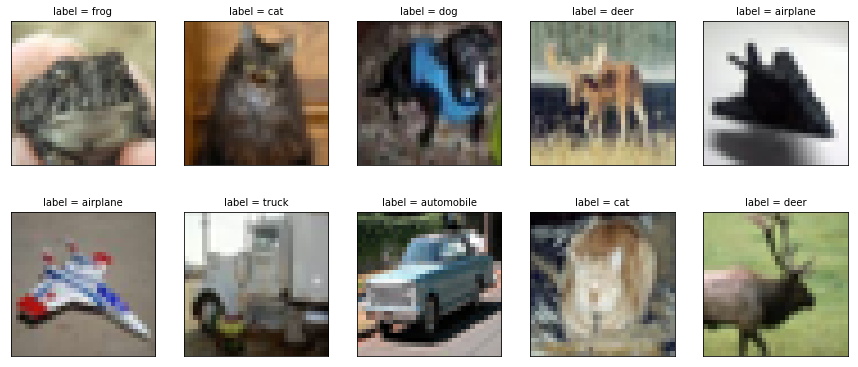

In [55]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 25)

In [26]:
# preprocessing

x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [27]:
x_img_train_normalize = x_img_train.astype("float32") / 255
x_img_test_normalize = x_img_test.astype("float32") / 255

In [28]:
x_img_train_normalize[0][0][0]

array([ 0.23137255,  0.24313726,  0.24705882], dtype=float32)

In [29]:
y_label_train.shape

(50000, 1)

In [30]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [31]:
from keras.utils import np_utils

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [32]:
y_label_train_OneHot.shape

(50000, 10)

In [33]:
y_label_train_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [34]:
# build model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [36]:
model = Sequential()

# first Conv and Pooling
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation="relu", padding="same"))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

# second Conv and Pooling
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation="softmax"))

In [38]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [39]:
# training model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x_img_train_normalize, 
                          y_label_train_OneHot, validation_split=0.2, 
                          epochs=10, batch_size=128, verbose=2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 91s - loss: 1.5230 - acc: 0.4539 - val_loss: 1.2875 - val_acc: 0.5818
Epoch 2/10
 - 89s - loss: 1.1305 - acc: 0.5990 - val_loss: 1.1339 - val_acc: 0.6276
Epoch 3/10
 - 86s - loss: 0.9974 - acc: 0.6456 - val_loss: 1.0096 - val_acc: 0.6678
Epoch 4/10
 - 87s - loss: 0.8977 - acc: 0.6842 - val_loss: 0.9517 - val_acc: 0.6871
Epoch 5/10
 - 86s - loss: 0.8142 - acc: 0.7137 - val_loss: 0.8936 - val_acc: 0.7072
Epoch 6/10
 - 86s - loss: 0.7326 - acc: 0.7410 - val_loss: 0.8616 - val_acc: 0.7132
Epoch 7/10
 - 87s - loss: 0.6640 - acc: 0.7642 - val_loss: 0.8467 - val_acc: 0.7136
Epoch 8/10
 - 89s - loss: 0.5949 - acc: 0.7914 - val_loss: 0.7931 - val_acc: 0.7378
Epoch 9/10
 - 88s - loss: 0.5350 - acc: 0.8114 - val_loss: 0.7833 - val_acc: 0.7374
Epoch 10/10
 - 87s - loss: 0.4740 - acc: 0.8335 - val_loss: 0.7657 - val_acc: 0.7392


In [43]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

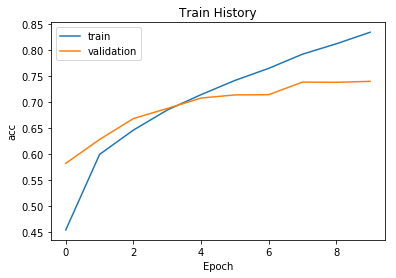

In [45]:
show_train_history(train_history, "acc", "val_acc")

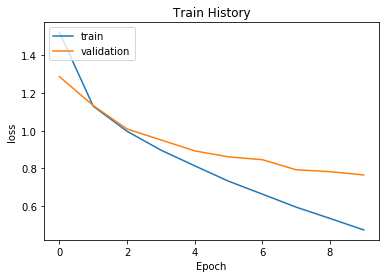

In [46]:
show_train_history(train_history, "loss", "val_loss")

In [47]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)

In [48]:
scores[1]

0.72989999999999999

In [49]:
# predict

prediction = model.predict_classes(x_img_test_normalize)

10000/10000 [==============================] - 5s 495us/step


In [50]:
prediction[:10]

array([3, 1, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

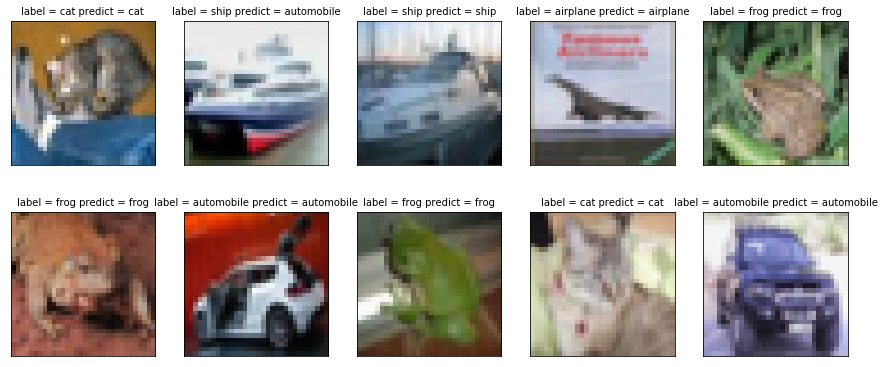

In [56]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [57]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [59]:
Predicted_Probability[0]

array([  6.81775855e-04,   1.17845749e-02,   4.92417673e-03,
         7.45825291e-01,   3.14477482e-03,   1.79835945e-01,
         1.17000742e-02,   5.41622052e-03,   3.17733027e-02,
         4.91377665e-03], dtype=float32)

In [74]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, index):
    print("label:", label_dict[y[index][0]], " predict:", label_dict[prediction[index]])
    plt.figure(figsize=(2,2))
    plt.imshow(x_img[index])
    plt.show()
    for i in range(10):
        print(label_dict[i] + " Probability:%1.9f"%Predicted_Probability[index][i])

label: cat  predict: cat


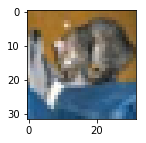

airplane Probability:0.000681776
automobile Probability:0.011784575
bird Probability:0.004924177
cat Probability:0.745825291
deer Probability:0.003144775
dog Probability:0.179835945
frog Probability:0.011700074
horse Probability:0.005416221
ship Probability:0.031773303
truck Probability:0.004913777


In [75]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 0)

label: airplane  predict: airplane


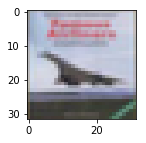

airplane Probability:0.448974550
automobile Probability:0.036149498
bird Probability:0.013387494
cat Probability:0.001351611
deer Probability:0.059802257
dog Probability:0.000094155
frog Probability:0.000090526
horse Probability:0.000109715
ship Probability:0.437413067
truck Probability:0.002627218


In [76]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 3)

In [77]:
prediction.shape

(10000,)

In [78]:
y_label_test.shape

(10000, 1)

In [79]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [80]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=["label"], colnames=["predict"])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,694,23,76,16,22,1,9,9,107,43
1,11,881,3,5,3,4,3,2,35,53
2,41,9,636,60,116,28,52,31,20,7
3,24,16,78,543,82,106,59,57,23,12
4,8,5,62,50,728,11,37,84,14,1
5,12,3,60,185,51,541,28,90,21,9
6,4,7,49,47,40,12,818,11,9,3
7,12,6,33,29,43,27,4,832,7,7
8,30,46,11,11,13,3,4,6,860,16


In [81]:
# build 3 layres model

model = Sequential()

# first Conv and Pooling
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation="relu", padding="same"))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

# second Conv and Pooling
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

# third Conv and Pooling

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(2500, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(1500, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation="softmax"))


In [82]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [83]:
# training model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x_img_train_normalize, 
                          y_label_train_OneHot, validation_split=0.2, 
                          epochs=10, batch_size=300, verbose=2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 241s - loss: 1.9566 - acc: 0.2650 - val_loss: 1.8075 - val_acc: 0.3496
Epoch 2/10
 - 259s - loss: 1.5123 - acc: 0.4414 - val_loss: 1.5962 - val_acc: 0.4377
Epoch 3/10
 - 227s - loss: 1.2965 - acc: 0.5256 - val_loss: 1.2523 - val_acc: 0.5509
Epoch 4/10
 - 231s - loss: 1.1558 - acc: 0.5847 - val_loss: 1.0814 - val_acc: 0.6164
Epoch 5/10
 - 237s - loss: 1.0423 - acc: 0.6263 - val_loss: 0.9619 - val_acc: 0.6606
Epoch 6/10
 - 239s - loss: 0.9496 - acc: 0.6624 - val_loss: 0.8679 - val_acc: 0.6936
Epoch 7/10
 - 246s - loss: 0.8634 - acc: 0.6909 - val_loss: 0.8722 - val_acc: 0.6984
Epoch 8/10
 - 258s - loss: 0.7984 - acc: 0.7165 - val_loss: 0.7831 - val_acc: 0.7305
Epoch 9/10
 - 234s - loss: 0.7513 - acc: 0.7315 - val_loss: 0.7732 - val_acc: 0.7339
Epoch 10/10
 - 250s - loss: 0.6964 - acc: 0.7531 - val_loss: 0.7281 - val_acc: 0.7454


In [84]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)
scores[1]

0.73919999999999997